<a href="https://colab.research.google.com/github/Blvisse/10-Academy/blob/main/twitterAnlysisDay3/TweetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libararies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**The workflow diagram for the process**

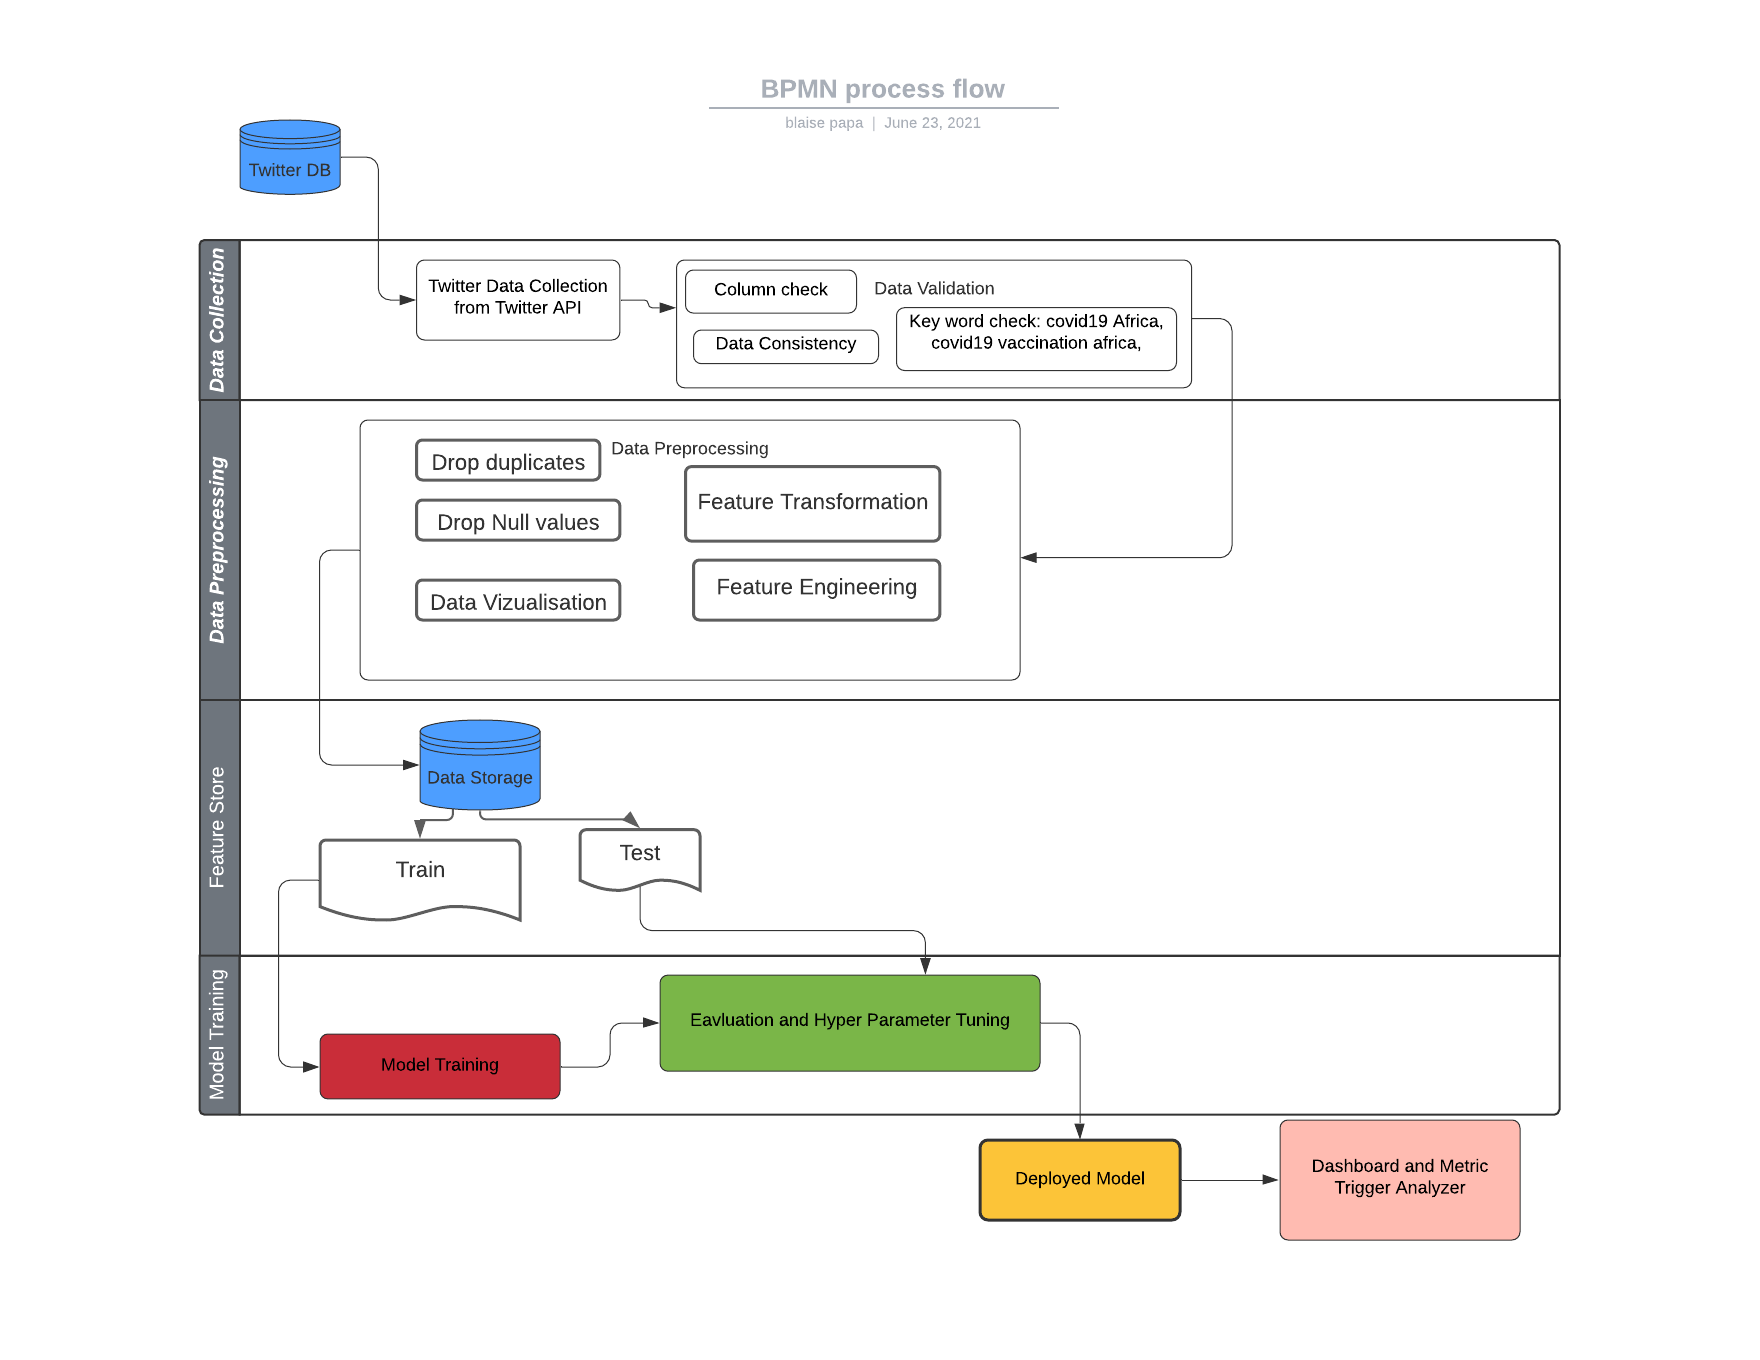

In [12]:
class DataReading:
    
    """
    Module to load data 
    
    """
    
    def dataRead(df):
        data=pd.read_csv(df)
        
        return data

data=DataReading.dataRead('/content/processed_tweetsz.csv')

In [13]:
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,None
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",None
2,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,None
3,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @CDCDirector: I’m pleased to welcome the #W...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA,None
4,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @RealJoelSmalley: Yet another amazingly qua...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France",None


In [19]:

    
class  dataCleaning:
    
    """
    This module is focused on data cleaning steps
    
    Functions in the module transform the raw data to 
    
    """
    #create a constructor with the data
    def __init__(self,data):

      self.data=data 

    def dropNullCols(df)->pd.DataFrame:
        
        df=df.dropna(inplace=True)
        
        return df
    
    def dropSpecificCols(self,cols):
        df.dropna(labels=[cols],inpalce=True,axis=1)
        
        return df
    
    def stripTweets(self):
        df[cols]=df[cols].apply(lambda x: x.strip(":")[1])
        
    def fixDateTime(df,cols):
        df[cols]=pd.to_datetime(df[cols])
        
    
    
    
class dataFE:
    
    def text_category(pval):
          if pval==0:
            return "neutral"
          elif pval>0:
            return "positive"
          else:
            return "negative"
      

        
        
        
    def hourofDay(df,cols):
        df['hour']=pd.DatetimeIndex(df[cols]).hour
    def dayofYear(df,cols):
        df['day']=pd.DatetimeIndex(df[cols]).day
    def stripText(df,cols):
        df[cols]=df[cols].apply(lambda x: x.lower())
        df[cols]=df[cols].apply(lambda x: x.replace('#',''))
        df[cols]=df[cols].apply(lambda x: x.replace('"',''))

class dataViz:
    def countPlots(df,cols):
        df[cols].value_counts().plot(kind='bar')
        
    def freqWords(df,cols):
        import matplotlib.pyplot as plt
        from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
        plt.figure(figsize=(20, 10))
        plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(df[cols].values)))
        plt.axis('off')
        plt.title('Most Frequent Words In Our Tweets',fontsize=16)
        plt.show()
    
        


In [20]:
data['original_text']=data['original_text'].apply( lambda x: x.split(":")[1])

In [21]:
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,None
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",None
2,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,None
3,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA,None
4,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France",None


In [22]:
   
data['user_mentions']=data['user_mentions'].apply(lambda x:x.split(",")[1].split(":")[1])

data['user_mentions']=data['user_mentions'].apply(lambda x:x.strip("''"))
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None
2,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None
3,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None
4,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Sat Jun 19 07:40:53 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None
3188,Sat Jun 19 07:41:00 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None
3189,Sat Jun 19 07:41:09 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Liars. You tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False
3190,Sat Jun 19 07:41:26 +0000 2021,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None


In [25]:
import re
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall("('[A-Za-z]+[A-Za-z0-9-_]+',)", tweet)

In [26]:
r=data['hashtags'].apply(find_hashtags)
r

0                                 []
1                                 []
2                                 []
3       ['WeCanDoThis',, 'COVID19',]
4                                 []
                    ...             
3187                              []
3188                              []
3189                              []
3190                              []
3191                    ['COVID19',]
Name: hashtags, Length: 3192, dtype: object

In [27]:
removeWord=['text','indices']
pat=r'\b(?:{})\b'.format('|'.join(removeWord))


In [28]:
data['created_at']=pd.to_datetime(data['created_at'])

In [29]:
data['score']=data['polarity'].apply(dataFE.text_category)

In [30]:
dataFE.hourofDay(data,'created_at')

In [31]:
dataFE.dayofYear(data,'created_at')

In [32]:
data['original_text']=data['original_text'].apply(lambda x: x.replace('"',''))

In [33]:
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive,score,hour,day
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",🚨Africa is in the midst of a full-blown third...,0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None,neutral,17,18
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None,positive,17,18
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None,positive,17,18
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None,positive,17,18
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None,positive,17,18


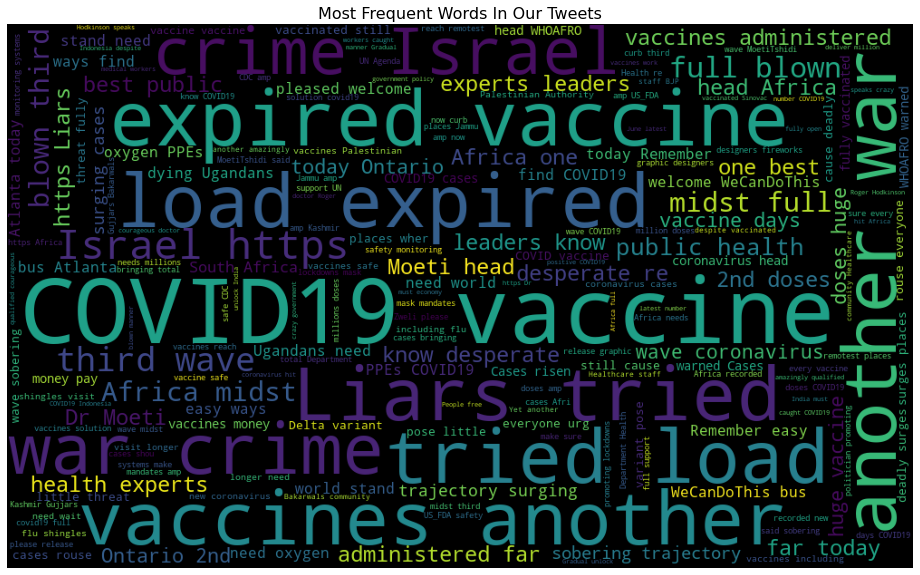

In [35]:
dataViz.freqWords(data,'original_text')

In [37]:
textData=data['original_text']

In [38]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words=stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
dataWords=list(sent_to_words(textData))

dataWords=remove_stopwords(dataWords)
    



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
dataWords[:1][0]

['africa',
 'midst',
 'full',
 'blown',
 'third',
 'wave',
 'coronavirus',
 'head',
 'whoafro',
 'warned',
 'cases',
 'risen']

In [40]:
import gensim.corpora as corpora


dicts=corpora.Dictionary(dataWords)
corpus= [dicts.doc2bow(text) for text in dataWords]

In [43]:
id2word = corpora.Dictionary(dataWords)

In [41]:
import pickle
pickle.dump(corpus,open('corpus.pkl','wb'))
dicts.save('dictionary.gensim')

In [44]:
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

lda_model.save('ldamodel.gensim')
topics=lda_model.print_topics()
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]
lda_model.save('model10.gensim')

[(0, '0.056*"covid" + 0.044*"vaccines" + 0.016*"https" + 0.014*"africa" + 0.012*"vaccine" + 0.011*"people" + 0.011*"israel" + 0.010*"amp" + 0.009*"risk" + 0.009*"south"'), (1, '0.036*"africa" + 0.032*"one" + 0.031*"public" + 0.030*"experts" + 0.030*"best" + 0.030*"health" + 0.029*"leaders" + 0.029*"head" + 0.029*"moeti" + 0.029*"know"'), (2, '0.065*"vaccines" + 0.059*"another" + 0.059*"expired" + 0.058*"israel" + 0.058*"war" + 0.058*"crime" + 0.058*"liars" + 0.058*"load" + 0.058*"tried" + 0.057*"https"'), (3, '0.031*"wave" + 0.031*"vaccines" + 0.031*"third" + 0.027*"africa" + 0.024*"covid" + 0.020*"full" + 0.020*"blown" + 0.019*"coronavirus" + 0.016*"amp" + 0.015*"israel"'), (4, '0.066*"covid" + 0.043*"vaccine" + 0.028*"today" + 0.023*"welcome" + 0.022*"pleased" + 0.022*"remember" + 0.022*"find" + 0.022*"easy" + 0.022*"atlanta" + 0.022*"ways"'), (5, '0.049*"covid" + 0.034*"vaccines" + 0.032*"vaccine" + 0.015*"africa" + 0.014*"get" + 0.011*"today" + 0.011*"doses" + 0.011*"ontario" + 0.0

In [45]:
!pip install pyLDavis

     |████████████████████████████████| 1.7MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 37.9MB/s 
     |████████████████████████████████| 15.7MB 137kB/s 
  Created wheel for pyLDavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=d3f519ee5090b207bf6d3eccf9ea413bab4b19a65a69a49e6648514619b2e1c4
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDavis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.21.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [46]:

dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
import pyLDAvis.gensim_models as gensims
lda_display = gensims.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


ImportError: ignored

# Model Classifier builder

In [47]:
data.drop(data.loc[data['score']=='neutral'].index,inplace=True)
data=data.reset_index(drop=True)

In [48]:
data['score']=np.where(data['score']=='positive',1,0)

In [49]:
X=data['original_text']
y=data['score'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [52]:

from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()

In [53]:
#count vectorizer with trigram
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(ngram_range=(3,3))

In [54]:

X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

In [55]:

sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score

In [57]:
#predict 
predictions=sgd.predict(X_test)

In [58]:

#evaluate using confusio matrix
confusion_matrix(y_test,predictions)

array([[ 86,  22],
       [  0, 447]])

In [59]:

#evaluate using f1 acore
f1_score(y_test,predictions)

0.9759825327510918

In [60]:
#get accuracy score
accuracy_score(y_test,predictions)

0.9603603603603603